In [71]:
# Data 205 - Capstone in Data Science
# Jennifer Paraboschi     Fall 2020
# Inputs: data sets from dataMontgomery
# including Alcohol Beverage Licensing Violations

In [72]:
# Import packages. 
# Pull in API data set as json.
import json
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly    # I had to pip install plotly on the cmd line to get plotly to work

In [73]:
violations_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json").json())
violations_data.head()
#pd.read_json("https://....")    #alternative way to get the data

,facilityname,address,violationdate,violation,disposition,dispositiondate
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 20902",2020-10-10T00:00:00.000,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-11-30T00:00:00.000
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-30T00:00:00.000,5.5 RECORDS,$500 +ALERT,2020-11-28T00:00:00.000
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19T00:00:00.000,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21T00:00:00.000
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-19T00:00:00.000,5.5 RECORDS,$500 +ALERT,2020-11-30T00:00:00.000
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-19T00:00:00.000,6.9 STORAGE,$1600 +ALERT,2020-11-30T00:00:00.000


In [74]:
print(violations_data)

             facilityname  \
0     HAKUNA MATATA GRILL   
1    MOGOTILLO RESTAURANT   
2         EL CARACOL CAFE   
3    MOGOTILLO RESTAURANT   
4    MOGOTILLO RESTAURANT   
..                    ...   
939          JOSE'S GRILL   
940          JOSE'S GRILL   
941    SEVEN-ELEVEN STORE   
942    SEVEN-ELEVEN STORE   
943    SEVEN-ELEVEN STORE   

                                                     address  \
0         2405 PRICE AVE. , SILVER SPRING , MARYLAND - 20902   
1    7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912   
2           609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910   
3    7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912   
4    7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912   
..                                                       ...   
939                   11423 GEORGIA AVE. , WHEATON, MD 20902   
940                   11423 GEORGIA AVE. , WHEATON, MD 20902   
941       14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 20906   
942        

In [75]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   facilityname     944 non-null    object
 1   address          944 non-null    object
 2   violationdate    944 non-null    object
 3   violation        944 non-null    object
 4   disposition      942 non-null    object
 5   dispositiondate  941 non-null    object
dtypes: object(6)
memory usage: 44.4+ KB


In [76]:
# need to change the dates so they are in a useable format.
violations_data.violationdate = pd.to_datetime(violations_data.violationdate)
violations_data.dispositiondate = pd.to_datetime(violations_data.dispositiondate)

In [80]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   facilityname     944 non-null    object        
 1   address          944 non-null    object        
 2   violationdate    944 non-null    datetime64[ns]
 3   violation        944 non-null    object        
 4   disposition      942 non-null    object        
 5   dispositiondate  941 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 44.4+ KB


In [81]:
violations_data.describe(include="all")

,facilityname,address,violationdate,violation,disposition,dispositiondate
count,944,944,944,944,942,941
unique,546,582,341,38,146,408
top,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2018-08-17 00:00:00,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2020-09-11 00:00:00
freq,11,11,16,381,96,18
first,NaN,NaN,2012-06-19 00:00:00,NaN,NaN,2016-01-19 00:00:00
last,NaN,NaN,2020-10-10 00:00:00,NaN,NaN,2020-11-30 00:00:00


In [ ]:
# There are a few missing values for disposition and disposition date (counts are fewer than total count in some columns).
# The most frequent violation is for sale to minor.

In [82]:
violations_data.isnull().sum()
# This gives the number of null values for each var.

facilityname       0
address            0
violationdate      0
violation          0
disposition        2
dispositiondate    3
dtype: int64

In [83]:
# Other EDA from https://www.youtube.com/watch?v=-o3AxdVcUtQ
violations_data.nunique()
# This gives the number of unique values for each variable

facilityname       546
address            582
violationdate      341
violation           38
disposition        146
dispositiondate    408
dtype: int64

In [84]:
# Provide a list of the violations.
violations_data.violation.unique()

array(['6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS',
       '5.5 RECORDS', '5.7 DISPLAY OF LICENSE', '6.9 STORAGE',
       '5.4 ALCOHOL AWARENESS CERTIFICATION',
       '6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS',
       '6.2 SALES OR SERVICE TO INTOXICATED PERSONS/CONSUMPTION OR POSSESSION BY\n\nINTOXICATED PERSONS',
       '5.2 CHANGES IN LICENSING INFORMATION', 'NO VIOLATION',
       '6.3 AGES OF EMPLOYEES', 'SALE TO MINOR',
       'LICENSE NOT PROPERLY DISPLAYED',
       'EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED',
       'ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES', 'STORAGE',
       'DISORDERLY HOUSE', 'NOISE/DISTURBANCE OF THE NEIGHBORHOOD',
       "LICENSEES' RESPONSIBILITY", 'ACTS CONTRARY TO LAW',
       'LICENSE COMPLIANCE CHECK',
       'DISPENSING LIQUOR BY BOTTLE FOR CONSUMPTION ONSITE',
       'REFILLING EMPTY/PARTIALLY EMPTY ALCOHOLIC BOTTLES',
       'RECORDS INVOICE VIOLATION', 'AGE OF EMPLOYEE VIOLATION',
       

In [85]:
# From this video https://www.youtube.com/watch?v=5NcbVYhQJvw
# count by category crosstab
violations_dist = violations_data.groupby("violation").size()

In [86]:
# Get counts of the number of violations at each violation type.
violations_data["violation"].value_counts().sort_values(ascending=False)

SALE TO MINOR                                                                                      381
ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES                                                 173
6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS                                  66
EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED                                                       64
LICENSE NOT PROPERLY DISPLAYED                                                                      57
RECORDS INVOICE VIOLATION                                                                           27
5.4 ALCOHOL AWARENESS CERTIFICATION                                                                 25
SALE/SERVICE TO INTOXICATED PATRON                                                                  16
STORAGE                                                                                             14
5.5 RECORDS                                                              

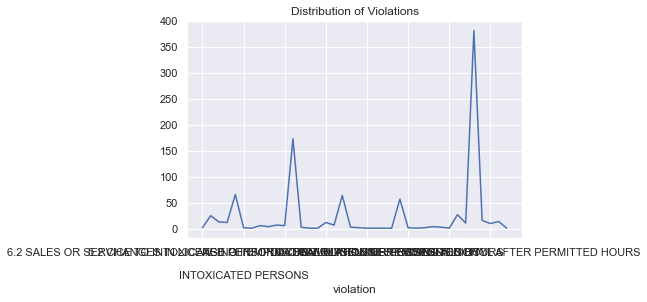

In [96]:
violations_dist.plot(title="Distribution of Violations")

In [ ]:
# This is not helpful unless I can clean it up. 

In [169]:
# Get counts of the number of violations at each facility name.
pd.set_option("display.max_rows", None)
violations_data["facilityname"].value_counts().sort_values(ascending=False)

GAITHERSBURG SUPERMARKET                           11
CAFE 20/20                                          8
KALDI'S COFFEE                                      8
GENTLEMAN JIM'S RESTAURANT                          6
BAR LOUIE                                           6
PANDORA SEAFOOD HOUSE                               6
MOGOTILLO RESTAURANT                                6
RESTAURANT POLLOS EL MESON                          6
AKIRA RAMEN IZAKAYA                                 6
OUTBACK STEAKHOUSE                                  5
OGEI'S CHICKEN & SUBS                               5
TRAPEZARIA MEDITERRANEAN KUZINA                     5
KAYPI RESTAURANT                                    5
CHIPOTLE MEXICAN GRILL                              5
TACO BAR                                            5
SUPER CHICKEN                                       5
FUSION BAR & GRILL                                  5
MIX BAR & GRILLE                                    5
FOOD STOP MINI MART         

In [98]:
"""
Explore the penalties for the violations
"""

'\nExplore the penalties for the violations\n'

In [99]:
# The disposition var inconsistently contains a $ amount of the penalty with inconsistent formatting. 
# Use a regex to extract the penalty values.
violations_data["penalty"]=violations_data["disposition"].str.extract(r"((?<=\$)\d+)")
# This regex looks for the dollar sign (\$), then pulls all the digits (\d+) unlimited times (to the end).

In [100]:
violations_data["penalty"] # checking that the penalty amounts pulled in correctly.

0      1000
1       500
2       100
3       500
4      1600
       ... 
939    3000
940    1000
941    1000
942    1000
943    1000
Name: penalty, Length: 944, dtype: object

In [101]:
violations_data["disposition"] # checking that the disposition column remained unchanged. 

0                   $1000 +ALERT
1                    $500 +ALERT
2                    $100 +ALERT
3                    $500 +ALERT
4                   $1600 +ALERT
                 ...            
939    SETTLED; $3000.00 + ALERT
940     SETTLED; $1000.00 +ALERT
941                 $1000 +ALERT
942                 $1000 +ALERT
943                 $1000 +ALERT
Name: disposition, Length: 944, dtype: object

In [102]:
violations_data.isnull().sum() # provides a count of nulls for each var.

facilityname        0
address             0
violationdate       0
violation           0
disposition         2
dispositiondate     3
penalty            51
dtype: int64

In [103]:
# There are 51 records with no penalty value (nulls). 
# Some records did not result in a penalty being assessed.
# Need to provide a value (0) for the missing penalty amounts. 

In [104]:
# Replace missing penalty values with 0.
violations_data["penalty"]=violations_data["penalty"].fillna(0)
# change the penalty type to an integer.
violations_data["penalty"]=violations_data["penalty"].astype(int)

In [105]:
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 20902",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-11-30,1000
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-19,5.5 RECORDS,$500 +ALERT,2020-11-30,500
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600
...,...,...,...,...,...,...,...
939,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-09-09,3000
940,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2012-12-20,SALE TO MINOR,SETTLED; $1000.00 +ALERT,2016-09-09,1000
941,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 20906",2012-10-19,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-09-24,1000
942,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MD - 20906",2012-06-20,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-09-24,1000


In [106]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   facilityname     944 non-null    object        
 1   address          944 non-null    object        
 2   violationdate    944 non-null    datetime64[ns]
 3   violation        944 non-null    object        
 4   disposition      942 non-null    object        
 5   dispositiondate  941 non-null    datetime64[ns]
 6   penalty          944 non-null    int32         
dtypes: datetime64[ns](2), int32(1), object(4)
memory usage: 48.1+ KB


In [107]:
# Get counts of the number of violations at each penalty amount.
violations_data["penalty"].value_counts().sort_values(ascending=False)

1000    394
100     208
500     157
2500     76
0        53
1         8
2         7
400       6
200       6
600       5
800       3
4         2
3000      2
1800      1
1200      1
2300      1
8         1
9         1
10        1
7200      1
8000      1
333       1
2000      1
5000      1
1500      1
2900      1
2600      1
1600      1
2800      1
7         1
Name: penalty, dtype: int64

In [108]:
# Most of the violations are for $1,000, $100, or $500. 
# Look at the max value or the facility that received the highest penalty amount.
violations_data[violations_data.penalty == violations_data.penalty.max()]

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty
479,SILVER SPRING HILTON HOTEL,"8727 COLESVILLE ROAD , SILVER SPRING, MD 20910",2018-04-11,SALE TO MINOR,SETTLED; $8000+ALERT,2018-08-02,8000


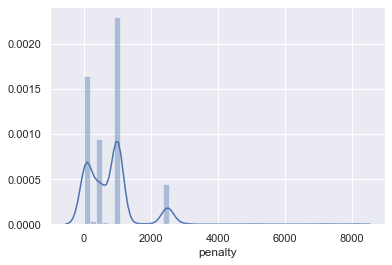

In [109]:
# Explore distribution of the penalty amounts.
sns.distplot(violations_data["penalty"])  # or can add , bins = 20)]

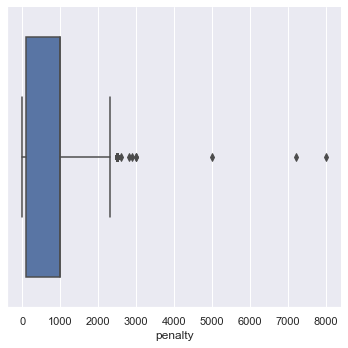

In [110]:
sns.catplot(x="penalty", kind="box", data=violations_data)

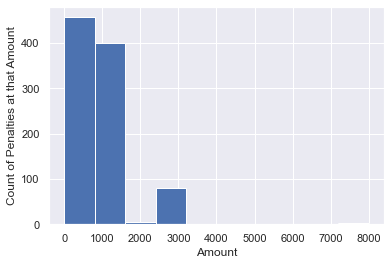

In [111]:
sns.set()
_ = plt.hist(violations_data['penalty'])
_ = plt.xlabel('Amount')
_ = plt.ylabel('Count of Penalties at that Amount')
plt.show()

In [112]:

# Perhaps look at average amount of penalty for each kind of violation. 
# Maybe bar charts of violation amounts by type. 

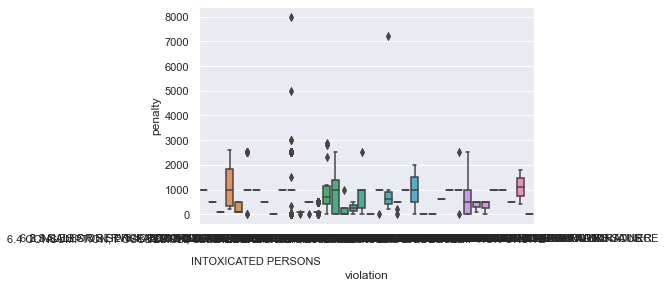

In [113]:
# box plot categorical vars
box_violations=sns.boxplot(x="violation", y="penalty", data=violations_data)

In [114]:
"""
Explore violations by zip code
"""

'\nExplore violations by zip code\n'

In [115]:
###working on the pulling the zips better
#(?<=MARYLAND).*?(?=\s)
#r"(?<=MARYLAND).*?(?=\d+$)

#violations_data.zips=violations_data.address.split("MARYLAND",1)[1] 
#violations_data

In [116]:
# Copy the license violations zip codes into a separate var.
# Use a regular expression to pull out the zip codes.
violations_data["zip"]=violations_data["address"].str.extract(r"((?<=.)\d{5})")
# positive lookbehind, matches to digits exactly 5 long

#violations_data["zip"]=violations_data["address"].str.extract(r"(\d+$)")
# This regex matches the characters (r) that are digits (\d) at the end ($). 
violations_data["zip"]=violations_data["zip"].astype(int)
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 20902",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-11-30,1000,20902
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500,20912
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100,20910
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-19,5.5 RECORDS,$500 +ALERT,2020-11-30,500,20912
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600,20912
...,...,...,...,...,...,...,...,...
939,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-09-09,3000,20902
940,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2012-12-20,SALE TO MINOR,SETTLED; $1000.00 +ALERT,2016-09-09,1000,20902
941,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 20906",2012-10-19,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-09-24,1000,20906
942,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MD - 20906",2012-06-20,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-09-24,1000,20906


In [117]:
pd.set_option("display.max_colwidth", None)
addr=violations_data["address"].astype(str)
mask=addr.str.slice(-5,-4,1) == "-"

In [118]:
violations_data.loc[mask, ["address","zip"]]

,address,zip
277,"3701 UNIVERSITY BLVD. W. , KENSINGTON, MD 20895-2123",20895
442,"2211 UNIVERSITY BLVD. W. B, WHEATON, MD 20902-4505",20902
525,"1339 LAMBERTON DRIVE , SILVER SPRING, MD 20902-3414",20902
535,"11407 LOCKWOOD DRIVE , SILVER SPRING, MD 20904-2610",20904
583,"19950 FISHER AVE. , POOLESVILLE, MD 20837-2076",20837
598,"4906 SAINT ELMO AVE. , BETHESDA, MD 20814-6008",20814
599,"4958 BETHESDA AVE. , BETHESDA, MD 20814-5204",20814
624,"3701 UNIVERSITY BLVD. W. , KENSINGTON, MD 20895-2123",20895
636,"15209 FREDERICK ROAD , ROCKVILLE, MD 20850-1112",20850
712,"12351 GEORGIA AVE. , WHEATON, MD 20906-3649",20906


In [119]:
violations_data["address"]

0           2405 PRICE AVE. , SILVER SPRING , MARYLAND - 20902
1      7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912
2             609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910
3      7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912
4      7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912
                                ...                           
939                     11423 GEORGIA AVE. , WHEATON, MD 20902
940                     11423 GEORGIA AVE. , WHEATON, MD 20902
941         14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 20906
942               14101 GEORGIA AVE. , ASPEN HILL , MD - 20906
943         14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 20906
Name: address, Length: 944, dtype: object

In [120]:
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 20902",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-11-30,1000,20902
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500,20912
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100,20910
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-19,5.5 RECORDS,$500 +ALERT,2020-11-30,500,20912
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAND - 20912",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600,20912
...,...,...,...,...,...,...,...,...
939,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-09-09,3000,20902
940,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2012-12-20,SALE TO MINOR,SETTLED; $1000.00 +ALERT,2016-09-09,1000,20902
941,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 20906",2012-10-19,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-09-24,1000,20906
942,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MD - 20906",2012-06-20,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS",$1000 +ALERT,2020-09-24,1000,20906


In [121]:
# Now I have the zip codes of the Alcohol Beverage License Violations in the var "zip".
# Do frequency of violations by zip code.

In [122]:
# Get counts of the number of violations by zip.
violations_data["zip"].value_counts().sort_values(ascending=False)

20814    118
20852    100
20850     97
20910     91
20878     89
20902     63
20877     62
20879     40
20874     34
20906     34
20876     23
20912     22
20904     19
20854     14
20815     14
20901     12
20832     10
20905     10
20872      9
20855      9
20851      9
20817      8
20871      8
20853      6
20903      6
20895      6
20837      5
20886      5
20816      5
20860      4
20867      2
20818      2
20882      2
20833      2
20866      2
20841      1
20861      1
Name: zip, dtype: int64

In [123]:
# Bethesda (20814) and Rockville (20852) have the 2 highest frequencies. 
# Other zips are incorrect and need fixed.
# pull the records where the zips are the last 4 digits into their own data set to identify them for cleaning.
#zip_fix=violations_data.loc[(violations_data['zip'] <= 20000)]
#zip_fix.sort_values(by=["zip", "address"])

In [124]:
#violations_data["zip"]=violations_data["zip"].astype(str)
#violations_data['zip'] = violations_data['zip'].replace(['1112','1909','2076','2123','2206','2610','2612','3414','3649','4505','5204','6008'],['20850','20906','20837','20895','20901','20904','20877','20902','20906','20902','20814','20814'])
#violations_data

In [125]:
# Get counts of the number of violations by zip.
#violations_data["zip"].value_counts().sort_values(ascending=False)

In [126]:
# Now the zips are all 5-digits

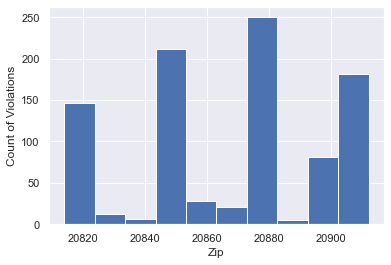

In [127]:
violations_data.sort_values(by=["zip", "facilityname"])

sns.set()
_ = plt.hist(violations_data["zip"])
_ = plt.xlabel('Zip')
_ = plt.ylabel('Count of Violations')
plt.show()

In [128]:
# This is too messy to see the zip codes. Try again.

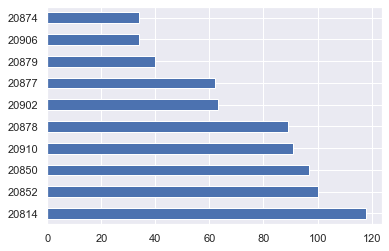

In [129]:
# This plots the top 10 most frequent zip codes. 
violations_data["zip"].value_counts()[:10].plot(kind="barh")


In [130]:
violations_data.loc[mask, ["address","zip"]]

,address,zip
277,"3701 UNIVERSITY BLVD. W. , KENSINGTON, MD 20895-2123",20895
442,"2211 UNIVERSITY BLVD. W. B, WHEATON, MD 20902-4505",20902
525,"1339 LAMBERTON DRIVE , SILVER SPRING, MD 20902-3414",20902
535,"11407 LOCKWOOD DRIVE , SILVER SPRING, MD 20904-2610",20904
583,"19950 FISHER AVE. , POOLESVILLE, MD 20837-2076",20837
598,"4906 SAINT ELMO AVE. , BETHESDA, MD 20814-6008",20814
599,"4958 BETHESDA AVE. , BETHESDA, MD 20814-5204",20814
624,"3701 UNIVERSITY BLVD. W. , KENSINGTON, MD 20895-2123",20895
636,"15209 FREDERICK ROAD , ROCKVILLE, MD 20850-1112",20850
712,"12351 GEORGIA AVE. , WHEATON, MD 20906-3649",20906


In [131]:
# This has the potential to be interesting as I recognize some of the zip codes/areas. 
# I'll come back to this.

In [132]:
### This works but there are too many zip codes to the display is too small to read.

# facet grid of violation amounts by zip code
#grid_viol_zip = sns.FacetGrid(violations_data, col="zip")
#grid_viol_zip.map(plt.hist, "penalty")

In [133]:
"""
Explore the violations involving minors.
"""

'\nExplore the violations involving minors.\n'

In [134]:
# Investigate frequencies by types of violations. 
# Group the sale to minor and 6.1 sales or service to minors. 

In [135]:
# Groupby() function to pull the 2 violations together.
violations_minors = violations_data.groupby("violation").get_group("SALE TO MINOR" or "6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS")

In [136]:
violations_minors

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
128,AKIRA RAMEN IZAKAYA,"1800 ROCKVILLE PIKE, UNIT H1 , ROCKVILLE, MD 20852",2019-10-09,SALE TO MINOR,SETTLED;$1000+ALERT,2019-10-09,1000,20852
131,BURGERFI,"11881 GRAND PARK AVE. , NORTH BETHESDA, MD 20852",2019-10-09,SALE TO MINOR,SETTLED;$1000+ALERT,2019-10-09,1000,20852
133,GYROLAND,"1701 ROCKVILLE PIKE B-3, ROCKVILLE, MD 20852",2019-10-09,SALE TO MINOR,SETTLED;$1000+ALERT,2019-10-09,1000,20852
135,OM INDIAN RESTAURANT,"785 ROCKVILLE PIKE K, ROCKVILLE, MD 20852",2019-10-09,SALE TO MINOR,$1000+ALERT,2019-10-09,1000,20852
137,PIKE CHICKEN & BEER,"1066 ROCKVILLE PIKE , ROCKVILLE, MD 20852",2019-10-09,SALE TO MINOR,SETTLED;$1000+ALERT,2019-10-09,1000,20852
...,...,...,...,...,...,...,...,...
936,FOOD STOP MINI MART,"4820 BOILING BROOK PARKWAY , ROCKVILLE, MD 20852",2015-06-25,SALE TO MINOR,SETTLED; $2500.00 + ALERT,2016-04-14,2500,20852
937,MASTER 8 BILLIARDS,"2640 UNIVERITY BLVD. , SILVER SPRING, MD 20902",2015-04-25,SALE TO MINOR,SETTLED; $1500.00\n+ALERT,2016-02-12,1500,20902
938,"CANCUN GRILL RESTAURANT, THE","11220 GEORGIA AVENUE , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-04-28,3000,20902
939,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-09-09,3000,20902


In [137]:
type(violations_minors)

pandas.core.frame.DataFrame

In [138]:
violations_minors.describe(include="all")

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
count,381,381,381,381,381,381,381.000000,381.000000
unique,344,355,116,1,55,250,NaN,NaN
top,COURTYARD BY MARRIOTT,"4820 BOILING BROOK PARKWAY , ROCKVILLE, MD 20852",2018-08-14 00:00:00,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2019-10-09 00:00:00,NaN,NaN
freq,4,4,10,381,89,6,NaN,NaN
first,NaN,NaN,2012-12-20 00:00:00,NaN,NaN,2016-01-19 00:00:00,NaN,NaN
last,NaN,NaN,2019-10-09 00:00:00,NaN,NaN,2019-10-09 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1208.341207,20868.627297
std,NaN,NaN,NaN,NaN,NaN,NaN,763.160688,30.565248
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,20814.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,20850.000000


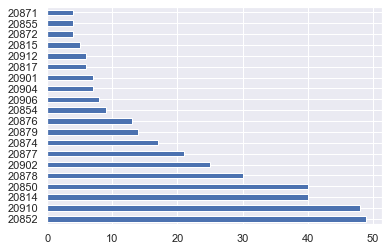

In [139]:
# This plots top 20 zip codes for the violations involving minors.
violations_minors["zip"].value_counts()[:20].plot(kind="barh")

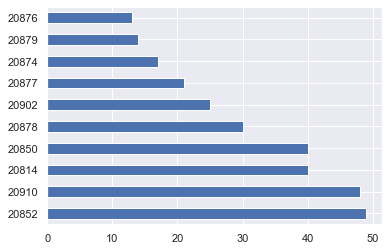

In [140]:
violations_minors["zip"].value_counts()[:10].plot(kind="barh")

In [141]:
# Since violations involving minors are the most frequent violation overall...
# the plots of the full data set and the violations involving minors data set are very similar.

In [ ]:
"""
Explore the High Schools
"""

In [142]:
# I may try to overlay the high school locations with areas of highest crime and/or alcohol violations. 

In [143]:
# Import the public high schools data set.
schools_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/772q-4wm8.json").json())
schools_data.head()

,category,school_name,address,city,zip_code,phone,url,longitude,latitude,location,:@computed_region_vu5j_pcmz,:@computed_region_tx5f_5em3,:@computed_region_kbsp_ykn9,:@computed_region_d7bw_bq6x,:@computed_region_rbt8_3x7n
0,HIGH SCHOOLS,Walter Johnson HS,6400 Rock Spring Dr,Bethesda,20814,301-803-7100,http://www.montgomeryschoolsmd.org/schools/wjhs,-77.1301017226,39.0253918855,"{'latitude': '39.0253918855', 'longitude': '-77.1301017226', 'human_address': '{""address"": ""6400 Rock Spring Dr"", ""city"": ""Bethesda"", ""state"": ""MD"", ""zip"": ""20814""}'}",1,1,19,103,1
1,HIGH SCHOOLS,Bethesda-Chevy Chase HS,4301 East West Hwy,Bethesda,20814,240-497-6300,http://www.montgomeryschoolsmd.org/schools/bcchs,-77.0889699717,38.9868264765,"{'latitude': '38.9868264765', 'longitude': '-77.0889699717', 'human_address': '{""address"": ""4301 East West Hwy"", ""city"": ""Bethesda"", ""state"": ""MD"", ""zip"": ""20814""}'}",1,1,12,111,1
2,ELEMENTARY SCHOOLS,Bethesda ES,7600 Arlington Rd,Bethesda,20814,301-657-4979,http://www.montgomeryschoolsmd.org/schools/bethesdaes,-77.0998645245,38.9864595389,"{'latitude': '38.9864595389', 'longitude': '-77.0998645245', 'human_address': '{""address"": ""7600 Arlington Rd"", ""city"": ""Bethesda"", ""state"": ""MD"", ""zip"": ""20814""}'}",1,1,12,111,1
3,ELEMENTARY SCHOOLS,Garrett Park ES (at Grosvenor Center),5701 Grosvenor La,Bethesda,20814,301-929-2170,http://www.montgomeryschoolsmd.org/schools/garrettparkes,-77.1141310594,39.0235338133,"{'latitude': '39.0235338133', 'longitude': '-77.1141310594', 'human_address': '{""address"": ""5701 Grosvenor La"", ""city"": ""Bethesda"", ""state"": ""MD"", ""zip"": ""20814""}'}",1,1,19,111,1
4,ELEMENTARY SCHOOLS,Somerset ES,5811 Warwick Pl,Chevy Chase,20815,301-657-4985,http://www.montgomeryschoolsmd.org/schools/somersetes,-77.092408162,38.9691922144,"{'latitude': '38.9691922144', 'longitude': '-77.092408162', 'human_address': '{""address"": ""5811 Warwick Pl"", ""city"": ""Chevy Chase"", ""state"": ""MD"", ""zip"": ""20815""}'}",1,1,5,110,7


In [144]:
# Drop the unnecessary columns (i.e., category, elementary/middle schools, phone and url).

In [145]:
high_schools=schools_data[schools_data["category"] == "HIGH SCHOOLS"]
cols_drop=["category","phone","url"]
high_schools.drop(cols_drop, inplace=True, axis=1)
print(high_schools)

                 school_name                    address           city  \
0          Walter Johnson HS        6400 Rock Spring Dr       Bethesda   
1    Bethesda-Chevy Chase HS         4301 East West Hwy       Bethesda   
20           Walt Whitman HS          7100 Whittier Blv       Bethesda   
28            Poolesville HS           17501 Willard Rd    Poolesville   
37       Thomas S Wootton HS           2100 Wootton Pkw      Rockville   
40              Rockville HS          2100 Baltimore Rd      Rockville   
46     Richard Montgomery HS  250 Richard Montgomery Dr      Rockville   
60      Winston Churchill HS      11300 Gainsborough Rd        Potomac   
66     Col Zadok Magruder HS     5939 Muncaster Mill Rd      Rockville   
72               Sherwood HS  300 Olney Sandy Spring Rd   Sandy Spring   
75           Paint Branch HS     14121 Old Columbia Pik   Burtonsville   
76             Clarksburg HS              22500 Wims Rd     Clarksburg   
81               Damascus HS          

C:\Users\jenni\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Map the high school locations.

In [ ]:
# Import the plotly express package

import plotly.express as px

fig_schools = px.scatter_geo(high_schools, 
                     lon="longitude", 
                     lat="latitude",
                     # choose the map chart's projection
                     projection="albers usa",
                     center=dict(lon=-77.14, lat=39.098),
                     # columns which is in bold in the pop up
                     hover_name = "school_name",
                     # format of the popup not to display these columns' data
                     hover_data = {"longitude": False, "latitude": False})
fig_schools.show()



In [ ]:
# I'm having trouble zooming in on this map. I decided to use a different map (below) that includes streets.

In [ ]:
# Follow instructions from here: https://plotly.com/python/mapbox-layers/#openstreetmap-tiles-no-token-needed
high_schools['latitude']=high_schools['latitude'].astype(float)
high_schools['longitude']=high_schools['longitude'].astype(float)

fig_schools_map = px.scatter_mapbox(high_schools, lat="latitude", lon="longitude", hover_name="school_name", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_schools_map.update_layout(mapbox_style="open-street-map")
fig_schools_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_schools_map.show()


In [ ]:
# Note To Self: I don't know what to do about the warnings (above)
    # A value is trying to be set on a copy of a slice from a DataFrame.
    # Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Note To Self: While this map is OK, I can't decide what would make it better. 
# I was not able to make the points/circles bigger.
# I tried zooming in closer but then not all of the high schools show up.
# I tried to get the city to display as well as the HS name but was not able to get this to work.

# I'll try to map the violations and schools using Tableau.

In [ ]:
"""
Explore mapping the violations.
"""

In [ ]:
# Note To Self: I was able to clean the violation addresses in excel, upload to geocodio, then use that csv to map. 
# However, I want to be able to do this directly from the dataMontgomery API. 

# I tried again for the geolocation using geopy (below) following these instructions from towardsdatascience.com.
#  https://towardsdatascience.com/pythons-geocoding-convert-a-list-of-addresses-into-a-map-f522ef513fd6
# I think there is a limit to how many times I can use the geolocater/site though. Not sure about that. 

In [ ]:
# Import the violations data set (I don't need to do this repeatedly but sometimes I am picking up here when I start again)
violations_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json").json())
violations_data.head()

In [ ]:
# I had to pip install geopy on the cmd line to get this to work.
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="sample app")
# Apply geolocator.geocode to the address column
violations_data["location"]=violations_data["address"].apply(geolocator.geocode)

In [ ]:
violations_data["point"]=violations_data["location"].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
# Then pull the values into 3 diff vars (the 3rd one is altitude)

In [ ]:
violations_data[["latitude", "longitude", "altitude"]] = pd.DataFrame(violations_data["point"].to_list(), index=violations_data.index)

In [ ]:
# Map the locations of the violations
fig_violations_map = px.scatter_mapbox(violations_data, lat="latitude", lon="longitude", hover_name="facilityname", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_violations_map.update_layout(mapbox_style="open-street-map")
fig_violations_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_violations_map.show()


In [ ]:
"""
Explore CRASH data
"""

In [ ]:
# Pull in the Crash Incidents data 
# Trying to narrow down by alcohol activity because the dataset is so big.
selections = {"Driver Substance Abuse": "ALCOHOL PRESENT"}

crash_incidents_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/bhju-22kf.json",params=selections).json())
crash_incidents_data.head()

In [ ]:
crash_incidents_data.shape

In [ ]:
crash_incidents_data.describe(include="all")

In [ ]:
"""
Explore CRIME data
"""

In [153]:
# Pull in the Crimes data 
# Trying to narrow by crimes against society and then crime2 for alcohol violations. 
# looking at the crimes data, there are only 8 alcohol-related crimes in the crimes data set.
# under Crime Name 2  Drunkenness,  Driving Under the Influence,  Liquor Law Violations
#select_crime = {"crimename1": "Crime Against Society"}

crime_data = pd.read_csv("crime.csv")
crime_data.head()

C:\Users\jenni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201087097,5707,16033232,NaN,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,...,NaN,CONNECTICUT,NaN,AVE,7/1/2016 0:04,NaN,39.078911,-77.080827,4D,"(39.0789, -77.0808)"
1,201215730,5311,180058531,11/22/2018 4:58,90C,1,Crime Against Society,Disorderly Conduct,PUBLIC PEACE - DISORDERLY CONDUCT,CITY OF TAKOMA PARK,...,NaN,NEW HAMPSHIRE,NaN,AVE,11/22/2018 4:58,11/22/2018 10:00,38.973022,-76.996799,8D,"(38.973, -76.9968)"
2,201229073,3562,190009928,3/3/2019 4:59,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,OVERLEA,NaN,RD,3/3/2019 4:52,3/3/2019 4:57,38.956840,-77.111362,2D,"(38.9568, -77.1114)"
3,201233523,1114,190015440,4/3/2019 11:53,11B,1,Crime Against Person,Forcible Sodomy,SEX ASSAULT - SODOMY-GIRL-STRONG-ARM,SILVER SPRING,...,NaN,UNIVERSITY,E,BLV,4/2/2019 11:00,4/2/2019 12:00,39.020392,-77.012776,3D,"(39.0204, -77.0128)"
4,201087102,3562,16033238,NaN,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,SILVER SPRING,...,NaN,SILVER SPRING,NaN,AVE,7/1/2016 0:58,7/1/2016 0:58,38.991701,-77.024096,3D,"(38.9917, -77.0241)"


In [154]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225690 entries, 0 to 225689
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             225690 non-null  int64  
 1   Offence Code            225690 non-null  object 
 2   CR Number               225690 non-null  int64  
 3   Dispatch Date / Time    156891 non-null  object 
 4   NIBRS Code              225690 non-null  object 
 5   Victims                 225690 non-null  int64  
 6   Crime Name1             225549 non-null  object 
 7   Crime Name2             225549 non-null  object 
 8   Crime Name3             225549 non-null  object 
 9   Police District Name    225690 non-null  object 
 10  Block Address           205188 non-null  object 
 11  City                    224633 non-null  object 
 12  State                   225690 non-null  object 
 13  Zip Code                222503 non-null  float64
 14  Agency              

In [155]:
# Drop unnecessary columns
cols_to_drop=["Offence Code","CR Number","Dispatch Date / Time","Victims","Agency","Place","Sector","Beat","PRA","Address Number","Street Prefix","Street Name","Street Suffix","Street Type","End_Date_Time"]
crime_data.drop(cols_to_drop, inplace=True, axis=1)
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225690 entries, 0 to 225689
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             225690 non-null  int64  
 1   NIBRS Code              225690 non-null  object 
 2   Crime Name1             225549 non-null  object 
 3   Crime Name2             225549 non-null  object 
 4   Crime Name3             225549 non-null  object 
 5   Police District Name    225690 non-null  object 
 6   Block Address           205188 non-null  object 
 7   City                    224633 non-null  object 
 8   State                   225690 non-null  object 
 9   Zip Code                222503 non-null  float64
 10  Start_Date_Time         225690 non-null  object 
 11  Latitude                225690 non-null  float64
 12  Longitude               225690 non-null  float64
 13  Police District Number  225690 non-null  object 
 14  Location            

In [156]:
crime_data.describe(include="all")

,Incident ID,NIBRS Code,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Start_Date_Time,Latitude,Longitude,Police District Number,Location
count,2.256900e+05,225690,225549,225549,225549,225690,205188,224633,225690,222503.000000,225690,225690.000000,225690.000000,225690,225690
unique,NaN,55,5,56,325,9,19886,45,10,NaN,163266,NaN,NaN,9,23457
top,NaN,90Z,Crime Against Property,All Other Offenses,LARCENY - FROM AUTO,SILVER SPRING,11100 BLK VEIRS MILL RD,SILVER SPRING,MD,NaN,11/30/2019 12:00,NaN,NaN,3D,"(39.0374, -77.0517)"
freq,NaN,51802,98217,52181,19682,48099,3174,79153,225497,NaN,43,NaN,NaN,48099,3173
mean,2.011975e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20876.692319,NaN,38.971249,-76.897092,NaN,NaN
std,6.328326e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.291199,NaN,2.071290,4.085747,NaN,NaN
min,2.010871e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,0.000000,-77.516753,NaN,NaN
25%,2.011431e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20853.000000,NaN,39.023078,-77.197691,NaN,NaN
50%,2.011977e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20878.000000,NaN,39.075498,-77.102480,NaN,NaN
75%,2.012518e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20904.000000,NaN,39.142651,-77.031830,NaN,NaN


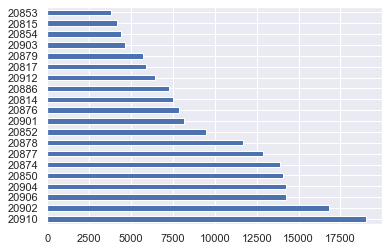

In [159]:
# There are 3,187 records with blank zip codes.
# There are another 200+ with incorrect zips (wrong number of digits and/or not in Montgomery County).
# Replace missing zip codes values with 0.
crime_data["Zip Code"]=crime_data["Zip Code"].fillna(0)
# change the zip code type to an integer.
crime_data["Zip Code"]=crime_data["Zip Code"].astype(int)

# This plots top 20 zip codes for the crimes.
crime_data["Zip Code"].value_counts()[:20].plot(kind="barh")

In [ ]:
"""
Explore Population data by zip code
"""

In [ ]:
# Pull population data from this site https://worldpopulationreview.com/zips/maryland
# This is the csv link:  blob:https://worldpopulationreview.com/00124d35-9d90-48ad-973f-a3eaddcbe13e 
# this is the json link:  blob:https://worldpopulationreview.com/eaa13b61-5379-49d2-a077-3d611a223c7b
# I downloaded MD counties with populations by zip code so I can select Montgomery County. 
# The site says it reflects 2020 population data.
# blob:https://worldpopulationreview.com/087018d8-c25a-44cf-a6d9-cb479a108878
  #      blob:https://worldpopulationreview.com/507fea65-9f1a-483d-89a4-b640e1b3e9bb

In [ ]:
pop_zip_codes = pd.read_csv('PopulationZip.csv')
pop_zip_codes.head()

In [ ]:
pop_zip_codes.info()

In [ ]:
# groupby() to pull only Montgomery County zips.
pop_zip_mont = pop_zip_codes.groupby("county").get_group("Montgomery")
pop_zip_mont

In [ ]:
# Get frequency of all crimes by zip code. (crimes data set has zip code column) 
# Need to calculate violations per population by zip code and crimes per population by zip code. 
# Compare alcohol violations by zip code with crimes by zip code. 

In [ ]:
# zip codes with high crime rates and zip codes with high ABS licenses and/or violations = correlation? 
# not just look at major crimes but also petty crimes. 

# Do this by taking ABS licenses (or violations) by population by zip code? 
# Then crimes by population by zip code? 